Imports

In [137]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import squarify as sq

In [138]:
df = pd.read_csv('Cleaned_Ramen.csv') #Cleaned csv data with new column added in excel (codes) 
df

,Review #,Brand,Style,Country,Stars,Codes
0,2580.0,New Touch,Cup,Japan,3.75,JPN
1,2579.0,Just Way,Pack,Taiwan,1.00,TWN
2,2578.0,Nissin,Cup,USA,2.25,USA
3,2577.0,Wei Lih,Pack,Taiwan,2.75,TWN
4,2576.0,Ching's Secret,Pack,India,3.75,IND
...,...,...,...,...,...,...
2575,NaN,NaN,NaN,Vietnam,NaN,NaN
2576,NaN,NaN,NaN,Thailand,NaN,NaN
2577,NaN,NaN,NaN,Thailand,NaN,NaN
2578,NaN,NaN,NaN,Thailand,NaN,NaN


In [140]:
byCountry = df.groupby('Country').mean() 
byCountry #Average rating per country

,Review #,Stars
Country,,
Australia,2002.863636,4.102273
Bangladesh,1951.857143,4.285714
Brazil,2091.600000,3.200000
Cambodia,1820.400000,3.600000
Canada,1358.853659,3.506098
China,1324.538462,3.623373
Colombia,1262.500000,4.208333
Dubai,750.000000,3.833333
Estonia,1096.500000,3.625000


C:\Users\Phelan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



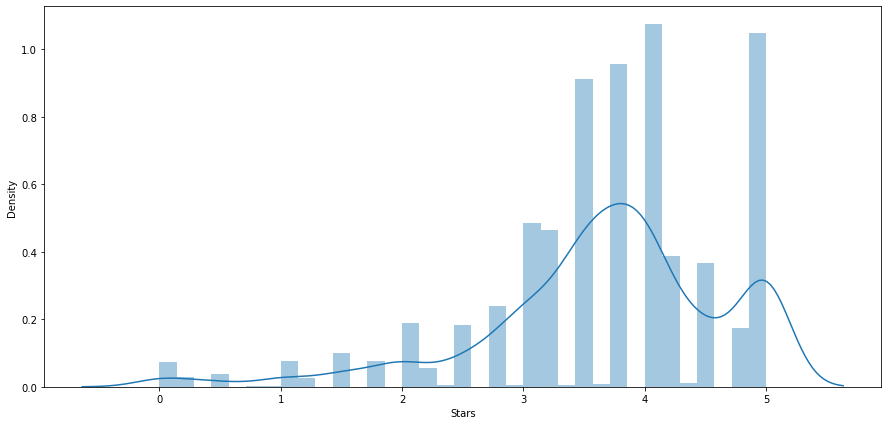

In [141]:
plt.figure(figsize = (15,7)) #distributiion plot showing how well the ramen was rated 
ax = sns.distplot(df['Stars'])

In [142]:
df['Country'].value_counts().head(10) #top 10 countries with largest selection of ramen 

Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Name: Country, dtype: int64

In [143]:
JAP = df[df['Country'] == 'Japan'].count()[0]
USA = df[df['Country'] == 'USA'].count()[0]
SK = df[df['Country'] == 'South Korea'].count()[0]
TWN = df[df['Country'] == 'Taiwan'].count()[0]
THD = df[df['Country'] == 'Thailand'].count()[0]
CHN = df[df['Country'] == 'China'].count()[0]
MLS = df[df['Country'] == 'Malaysia'].count()[0]
HK = df[df['Country'] == 'Hong Kong'].count()[0]
IND = df[df['Country'] == 'Indonesia'].count()[0]
SGP = df[df['Country'] == 'Singapore'].count()[0]

In [144]:
Countries = ['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 'China', 'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore']
Ramen = [JAP, USA, SK, TWN, THD, CHN, MLS, HK, IND, SGP]

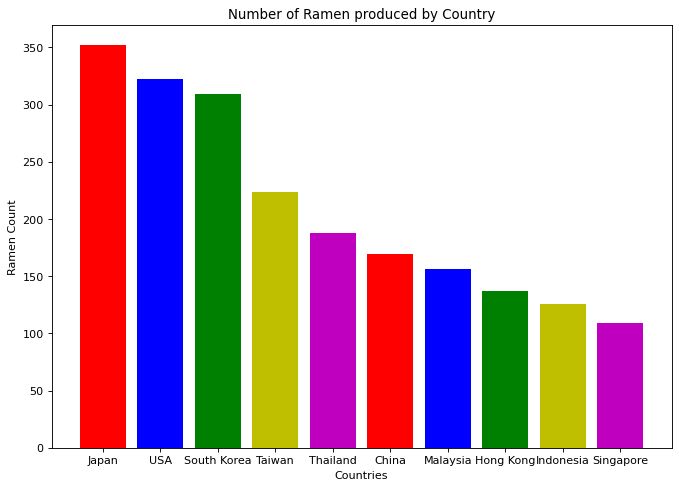

In [145]:
plt.figure(figsize=(10,7), dpi= 80)
plt.bar(x = Countries, height = Ramen, color = ['r','b','g','y','m'])

plt.xlabel("Countries")
plt.ylabel("Ramen Count")
plt.title("Number of Ramen produced by Country")

plt.show()

In [146]:
byStyle = df.groupby('Style').count()
byStyle #count of ramen styles 

,Review #,Brand,Country,Stars,Codes
Style,,,,,
Bar,1,1,1,1,1
Bowl,481,481,481,481,481
Box,6,6,6,6,6
Can,1,1,1,1,1
Cup,450,450,450,450,450
Pack,1528,1528,1528,1528,1528
Tray,108,108,108,108,108


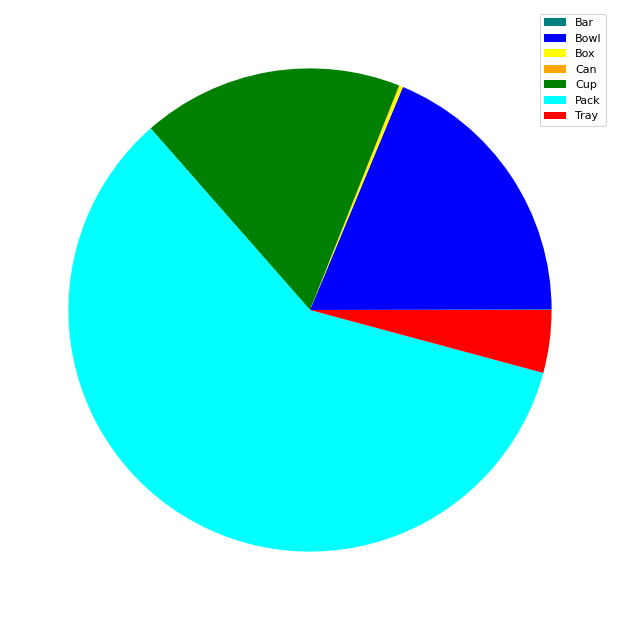

In [147]:
plt.figure(figsize=(10,10), dpi= 80)
plt.pie(byStyle["Country"], labels = None, colors = ['teal','blue','yellow','orange','green','cyan','red'])
plt.legend(byStyle.index, loc = 1)

plt.show() 

In [117]:
n = df.groupby('Country').count().sort_values('Brand', ascending=False)
a = df.groupby('Country').count().sort_values('Brand', ascending=False).index.get_level_values(0).tolist()
d = df.groupby('Country').count().sort_values('Brand', ascending=False).reset_index().Brand.values.tolist()
a

['Japan',
 'USA',
 'South Korea',
 'Taiwan',
 'Thailand',
 'China',
 'Malaysia',
 'Hong Kong',
 'Indonesia',
 'Singapore',
 'Vietnam',
 'UK',
 'Philippines',
 'Canada',
 'India',
 'Germany',
 'Mexico',
 'Australia',
 'Netherlands',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Hungary',
 'Bangladesh',
 'Colombia',
 'Brazil',
 'Cambodia',
 'Holland',
 'Poland',
 'Fiji',
 'Dubai',
 'Sarawak',
 'Sweden',
 'Finland',
 'Estonia',
 'Ghana',
 'Nigeria']

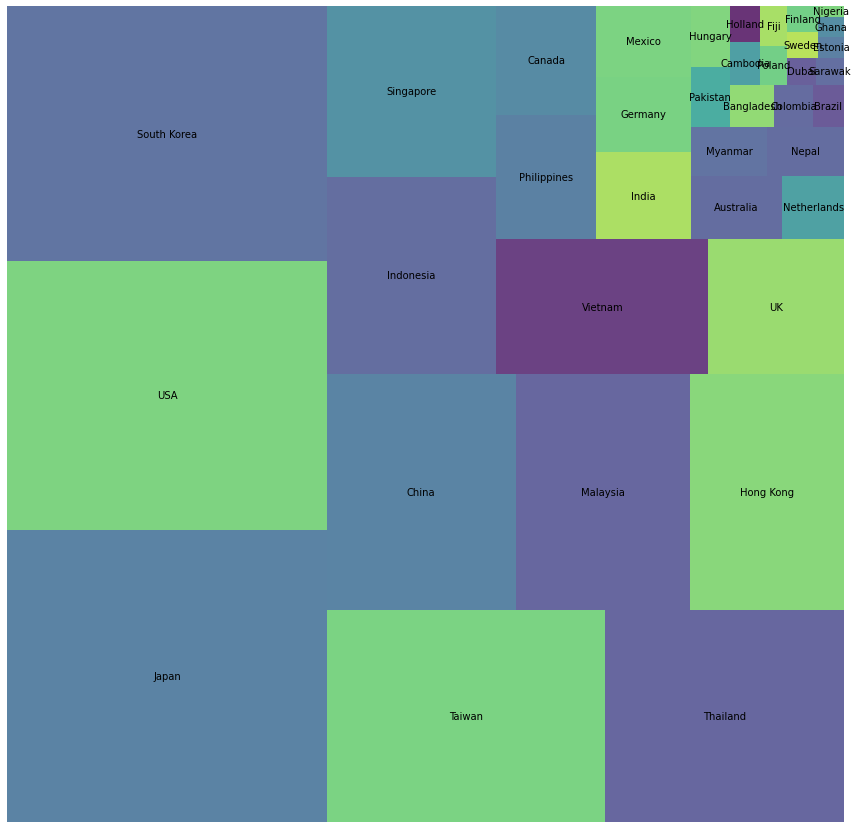

In [148]:
fig, ax = plt.subplots(1, figsize = (15,15))
sq.plot(sizes=d, label=a, alpha=.8)
plt.axis('off')
plt.show()

In [149]:
df.head(10)

,Review #,Brand,Style,Country,Stars,Codes
0,2580.0,New Touch,Cup,Japan,3.75,JPN
1,2579.0,Just Way,Pack,Taiwan,1.00,TWN
2,2578.0,Nissin,Cup,USA,2.25,USA
3,2577.0,Wei Lih,Pack,Taiwan,2.75,TWN
4,2576.0,Ching's Secret,Pack,India,3.75,IND
5,2575.0,Samyang Foods,Pack,South Korea,4.75,PRK
6,2574.0,Acecook,Cup,Japan,4.00,JPN
7,2573.0,Ikeda Shoku,Tray,Japan,3.75,JPN
8,2572.0,Ripe'n'Dry,Pack,Japan,0.25,JPN
9,2571.0,KOKA,Pack,Singapore,2.50,SGP


In [156]:
p = df.groupby('Codes').count().sort_values('Brand', ascending=False).index.get_level_values(0).tolist()
p

['JPN',
 'USA',
 'PRK',
 'TWN',
 'THA',
 'CHN',
 'MYS',
 'HKG',
 'IDN',
 'SGP',
 'VNM',
 'UK',
 'PHL',
 'CAN',
 'IND',
 'DEU',
 'MEX',
 'AUS',
 'NLD',
 'MMR',
 'NPL',
 'HUN',
 'PAK',
 'BGD',
 'COL',
 'KHN',
 'BRA',
 'POL',
 'Fiji',
 'SWE',
 'FIN',
 'ARE',
 'GHN',
 'EST',
 'NGA']

In [157]:
data = dict(
    type = 'choropleth',
    locations = p,
    z = d, 
    text = a, 
    colorbar = {'title': 'Count of Ramen'}
)

In [158]:
layout = dict( 
    title = 'Global Ramen Count by Country',
    geo = dict(
        showframe = False, 
        projection = {'type':'mercator'}
    )
)

In [159]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)